In [1]:
from utils.Encoder import Encoder
from utils.Classifier import Classifier
from utils.ModelBlock import ModelBlock
from utils.Detector import Detector
from utils.Segmenter import Segmenter

from tensorflow.keras.utils import plot_model

from tensorflow.keras.optimizers import Adam

from utils.loss.MTL_loss import MTL_loss
#import losses

In [2]:
INIT_LR = 1e-4
EPOCHS =20

In [3]:
encoder = Encoder()

In [15]:
Classification_head = Classifier(encoder)
Detector_head = Detector(encoder)
Segmenter_head = Segmenter(encoder)

In [16]:
MTL_model = ModelBlock.add_heads(encoder, [Classification_head ,Detector_head, Segmenter_head ])

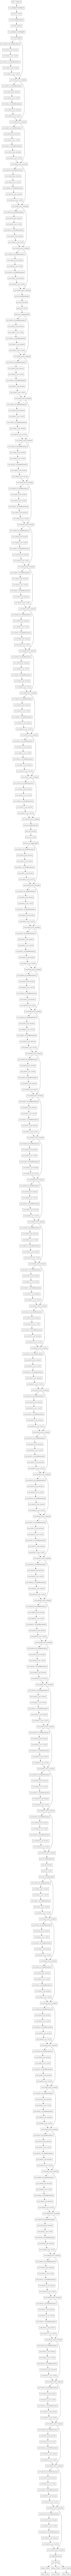

In [17]:
plot_model(MTL_model)

In [18]:
classification_loss= "categorical_crossentropy"
detection_loss= "categorical_crossentropy"
segmentation_loss= "categorical_crossentropy"

mtl_loss= MTL_loss(classification_loss , detection_loss ,segmentation_loss)
lossWeights = [1.0,1.0,1.0]

In [19]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

MTL_model.compile(optimizer=opt, loss=mtl_loss, metrics=["accuracy"])

In [20]:
#generate dummy data 
# going to be replaced with data loader
import numpy as np
trainX= np.random.rand(20,256,256,3)
trainY= np.random.rand(20,3)

testX= np.random.rand(20,256,256,3)
testY= np.random.rand(20,3)

trainX.shape ,trainY.shape

((20, 256, 256, 3), (20, 3))

In [21]:
H = MTL_model.fit(trainX,trainY,
    validation_data=(testX,testY),
    epochs=1,
    batch_size=8,
    verbose=1)

3/3 [==============================] - 6s 2s/step - loss: 9.2973 - dense_3_loss: 2.4980 - dense_4_loss: 3.4433 - dense_5_loss: 3.3561 - dense_3_accuracy: 0.3500 - dense_4_accuracy: 0.1500 - dense_5_accuracy: 0.2000 - val_loss: 6.1734 - val_dense_3_loss: 2.0103 - val_dense_4_loss: 2.0840 - val_dense_5_loss: 2.0791 - val_dense_3_accuracy: 0.4500 - val_dense_4_accuracy: 0.3000 - val_dense_5_accuracy: 0.2000
